# Data Scientist Challenge - LATAM Airlines

## Instrucciones

En Advanced Analytics valoramos muchísimo el trabajo en equipo y la constante interacción entre los distintos roles que trabajan en un producto basado en datos, como el Data Scientist, Machine Learning Engineering, Data Engineer, entre otros. Es por este motivo que una habilidad esencial que buscamos a la hora de buscar nuevos integrantes es el manejo adecuado de git. Este desafío deberá ser entregado en la plataforma de git que más te acomode y que sea pública para que la podamos revisar. Lo que buscamos con esto es poder entender de mejor manera el desarrollo que generaste con tu código, cómo lo fuiste mejorando en el tiempo y si tienes proyectos propios en este repositorio nos servirán para conocer mejor tu experiencia en base a tu propio
portafolio.

Instrucciones Git:
1) Crear un repositorio en la plataforma de git que más te acomode y que sea pública
2) Haber trabajado con una rama principal y otra de desarrollo. Opcional, ocupar alguna práctica de desarrollo de GitFlow.
Instrucciones del desafío:
1) Debes enviar el link al repositorio al mail del que fuiste contactado con asunto Challenge Data Scientist - [Nombre][Apellido], ejemplo Challenge Data Scientist - Pedro Pica Piedra.
2) Se aceptará los cambios en el repositorio hasta la fecha y hora que se indique en el mail.
3) En la siguiente carpeta de Google Drive encontrarás las instrucciones del desafío y el archivo `dataset_SCL.csv` que utilizarás para desarrollarlo.
4) El repositorio debe tener un jupyter notebook llamado solution.ipynb utilizando python 3. No serán revisados otros
lenguajes como R o similar.
5) En solution.ipynb deben estar resueltas las respuestas a todas las preguntas del desafío
6) Dentro del repositorio deben estar todos los archivos necesarios para que los evaluadores puedan clonar y luego correr tu
notebook sin problemas
7) Una copia de tu CV (curriculum vitae) en formato .pdf en el repositorio



## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

Fecha-I : Fecha y hora programada del vuelo.

Vlo-I : Número de vuelo programado.

Ori-I : Código de ciudad de origen programado.

Des-I : Código de ciudad de destino programado.

Emp-I : Código aerolínea de vuelo programado.

Fecha-O : Fecha y hora de operación del vuelo.

Vlo-O : Número de vuelo de operación del vuelo.

Ori-O : Código de ciudad de origen de operación

Des-O : Código de ciudad de destino de operación.

Emp-O : Código aerolínea de vuelo operado.

DIA : Día del mes de operación del vuelo.

MES : Número de mes de operación del vuelo.

AÑO : Año de operación del vuelo.

DIANOM : Día de la semana de operación del vuelo.

TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.

OPERA : Nombre de aerolínea que opera.

SIGLAORI : Nombre ciudad origen.

SIGLADES : Nombre ciudad destino.

### Desafío
1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
○ atraso_15 : 1 si dif_min > 15, 0 si no.
○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .
3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?
Aspectos a considerar
Orden y claridad al momento de plantear un análisis, idea, código, etc.
Creatividad para resolver el desafío.
Código versionado en Git.
No vamos a revisar excel, macros, códigos en R.
No vamos a revisar desafíos que no lleguen en la fecha indicada
Ante cualquier duda, deja explícitos tus supuestos
No vivimos en tu cabeza, trata de expresarte lo mejor posible para explicar tus decisiones y respuestas

## Paso 1: Lectura

In [125]:
# importamos librerías importantes para la tarea 
import pandas as pd
import os

In [128]:
# leemos la base cruda con pandas
raw = pd.read_csv('dataset_SCL.csv',
                  dtype={'Fecha-I':'str',
                         'Vlo-I':'str',
                         'Ori-I':'str',
                         'Des-I':'str',
                         'Emp-I':'str',
                         'Fecha-O':'str',
                         'Vlo-O':'str'})  # da algunos problemas porque Vlo-I parecía ser numérico pero no lo es. Ej: "405A"

In [129]:
# raw = pd.read_csv('dataset_SCL.csv')

In [130]:
# nuestra lectura de datos es un dataframe?
isinstance(raw, pd.DataFrame)

True

In [131]:
# Sí lo es, pues lo leímos read_csv de pandas que la transforma en dataframe, luego:
df = raw

## Paso 2: Exploración

In [132]:
# Tenemos 18 variables predictoras X1..X18 para nuestra variable respuesta Y (que, sospecho, debe ser la dif entre Fecha-I y Fecha-O)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [134]:
# vamos a mirar unos primeros valores del df
df.head(n=100)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-01-17 13:35:00,92,SCEL,SAEZ,ACA,2017-01-17 14:23:00,92,SCEL,SAEZ,ACA,17,1,2017,Martes,I,Air Canada,Santiago,Buenos Aires
96,2017-01-18 13:35:00,92,SCEL,SAEZ,ACA,2017-01-18 13:41:00,92,SCEL,SAEZ,ACA,18,1,2017,Miercoles,I,Air Canada,Santiago,Buenos Aires
97,2017-01-19 13:35:00,92,SCEL,SAEZ,ACA,2017-01-19 13:37:00,92,SCEL,SAEZ,ACA,19,1,2017,Jueves,I,Air Canada,Santiago,Buenos Aires
98,2017-01-20 13:35:00,92,SCEL,SAEZ,ACA,2017-01-20 14:03:00,92,SCEL,SAEZ,ACA,20,1,2017,Viernes,I,Air Canada,Santiago,Buenos Aires


In [135]:
# algunas estadísticas descriptivas
df.describe()
# no nos dice nada pq lo único numérico hasta ahora son DIA MES AÑO

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


## Paso 3: Pre-procesamiento de Valores faltantes (Missings)

In [136]:
# importamos el módulo ML necesario
from sklearn import preprocessing

In [137]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Tenemos suerte, sólo la columna Vlo-O tiene un espacio en blanco que presumiblemente sería un número: 200.

Supuesto: Dado que Vlo-I es también 200. Podemos quitar la linea completa o bien extrapolarlo. Es razonable llenar el dato faltante.


In [138]:
# Hay un dato faltante en la fila 6068 de la columna Vlo-O 
df.at[6068, 'Vlo-O']

nan

In [139]:
# lo llenamos
df.at[6068, 'Vlo-O'] = '200'

In [140]:
# lo revisamos
df.at[6068, 'Vlo-O']

'200'

In [141]:
# Luego ya no tenemos NANs
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

<AxesSubplot:xlabel='date'>

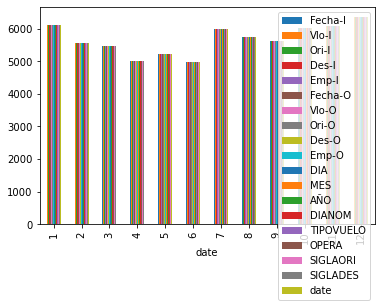

In [142]:
df["date"] = df["Fecha-O"].astype("datetime64")
df.groupby(df["date"].dt.month).count().plot(kind="bar")
# muy confuso, hagámoslo más sencillo.

<AxesSubplot:xlabel='OPERA'>

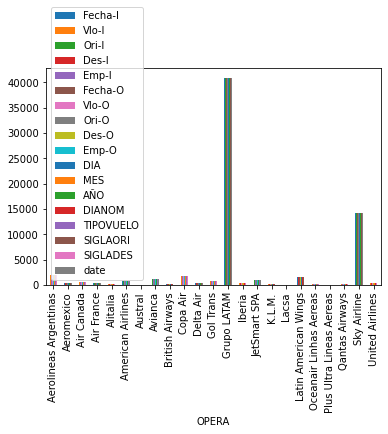

In [143]:
# Pequeño gráfico
df.groupby(df["OPERA"]).count().plot(kind="bar", )

In [144]:
# veamos la distribución de los vuelos
# quiero contar los vuelos Vlo-O, a través 2017
# luego, agrupados por Operador.

freqByDate = df.groupby(['AÑO', 'MES']).size() 
print(freqByDate)

AÑO   MES
2017  1      6106
      2      5561
      3      5482
      4      5020
      5      5240
      6      4981
      7      5992
      8      5744
      9      5610
      10     6032
      11     6080
      12     6356
2018  1         2
dtype: int64


In [145]:
# Agregados por Operador de vuelo y ordenados.
freqByOp = df.groupby(['OPERA']).size()
freqByOp.sort_values(axis=0)

OPERA
Plus Ultra Lineas Aereas       49
Austral                        74
Lacsa                          92
Qantas Airways                195
British Airways               205
K.L.M.                        251
Alitalia                      259
Oceanair Linhas Aereas        279
United Airlines               335
Aeromexico                    351
Air France                    358
Delta Air                     358
Iberia                        362
Air Canada                    565
American Airlines             757
Gol Trans                     806
JetSmart SPA                 1095
Avianca                      1152
Latin American Wings         1674
Copa Air                     1850
Aerolineas Argentinas        1949
Sky Airline                 14298
Grupo LATAM                 40892
dtype: int64

Claramente Grupo Latam y Sky Airline tienen la mayor participación.

### Pregunta 1: ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

En una 1era mirada tenemos: 

Una ventana temporal de un año (2017) de datos de vuelos de distintos operadores. Hay 2 datos de Enero 2018 que pueden confundirse en Enero de 2017 si hacemos agregación por MES solamente, pero para temas de distribución lo omitiremos.

1. Fecha-I y Fecha-O tienen formato "m/d/aaaa hh:mm"
2. I: Programado, lo planeado.
3. O: Operación, lo que realmente ocurrio.

Llama la atención que falta un dato en el registro posición 6068, que está en blanco. Pero bajo el supuesto de que, salvo 120 casos, Vlo-I = Vlo-O, lo llenamos con el número 200.

Mirando sólo descriptivamente la distribución de la cantidad de vuelos (operación) por fecha (agregación Año Mes) tenemos:

1. Se ve que la curva parte alta en Enero 2017 luego baja, supuestamente por temporada baja.
2. Se ve un pico en Julio, supuestamente vuelos internacionales que persiguen el calorcito de fin de año en el hemisferio Sur.
3. Hay otro pico en Septiembre, supuestamente por feriados alrededor del 18, porque parten a mitad de la 2da semana.
4. Se ve que desde Octubre 2017 vuelve a subir la curva hasta el máximo en Diciembre 2017, Navidad y verano en hemisferio Sur.

Me parece que habría que definir nuevas caracteristicas según lo solicitado, porque queremos modelar la diferencia entre las Fecha-I y Fecha-O, y en qué unidades medirlo. Definir también qué es un atraso. Además, según la distribución de vuelos en el año, podriamos decir algo sobre la temporada pues en verano (del hemisferio sur) hay una más vuelos que en invierno, hace sentido.

En el paso 4 vamos a definir lo que necesitemos.

## Paso 4: Definimos nuevas características

Definamos nuevas características (synthetic_features):

1. temporada_alta: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
2. dif_min: diferencia en minutos entre Fecha-O y Fecha-I .
3. atraso_15: 1 si dif_min > 15, 0 si no.
4. periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.



### 4.1. Definimos temporada_alta

In [187]:
# Se realizó 4.4.periodo_dia antes que 4.1.temporada_alta, pero son similares.
# Supuesto 1: Sin incluir extremos de las fechas.
# Supuesto 2: la condición (Fecha-I está entre 15-Dic y 3-Mar) supone que es antes de 3-Mar y después de 15-Dic,
# para que tenga sentido la condición. De otro modo, tendríamos que llamar temporada alta entre el 3-Mar a 15 Dic, lo cuál estaría erroneo.

In [188]:
import numpy as np
import pandas as pd
from datetime import datetime

In [189]:
#cambiamos las fechas a objeto datatime
from datetime import datetime

df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], errors='coerce')
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], errors='coerce')

In [190]:
# Fecha-I es type object, lo pasaremos a datetime
df['Fecha-I']

0       2017-01-01 23:30:00
1       2017-01-02 23:30:00
2       2017-01-03 23:30:00
3       2017-01-04 23:30:00
4       2017-01-05 23:30:00
                ...        
68201   2017-12-22 14:55:00
68202   2017-12-25 14:55:00
68203   2017-12-27 14:55:00
68204   2017-12-29 14:55:00
68205   2017-12-31 14:55:00
Name: Fecha-I, Length: 68206, dtype: datetime64[ns]

In [191]:
# Lo pasamos a datetime para poder compararlo más abajo en las condiciones
#df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')

In [192]:
df['Fecha-I']

0       2017-01-01 23:30:00
1       2017-01-02 23:30:00
2       2017-01-03 23:30:00
3       2017-01-04 23:30:00
4       2017-01-05 23:30:00
                ...        
68201   2017-12-22 14:55:00
68202   2017-12-25 14:55:00
68203   2017-12-27 14:55:00
68204   2017-12-29 14:55:00
68205   2017-12-31 14:55:00
Name: Fecha-I, Length: 68206, dtype: datetime64[ns]

In [193]:
import numpy as np
import datetime
# extraemos la parte dia mes de la fecha 
dateI = df['Fecha-I'].dt.date
#time = df['Fecha-I'].dt.strftime('%H:%M')
#dateI = pd.to_datetime(dateI, format='%Y-%m-%d %H:%M:%S')
dateI

0        2017-01-01
1        2017-01-02
2        2017-01-03
3        2017-01-04
4        2017-01-05
            ...    
68201    2017-12-22
68202    2017-12-25
68203    2017-12-27
68204    2017-12-29
68205    2017-12-31
Name: Fecha-I, Length: 68206, dtype: object

In [194]:
# vemos que funcione la comparación
dateI > datetime.date(2017, 1, 2)

0        False
1        False
2         True
3         True
4         True
         ...  
68201     True
68202     True
68203     True
68204     True
68205     True
Name: Fecha-I, Length: 68206, dtype: bool

In [195]:
# usaremos np.select() igual que en 4.4.

In [196]:
# creamos la lista de condiciones
conditions = [
    (dateI < datetime.date(2017, 3,3)),       # está antes de 3-Mar
    (dateI > datetime.date(2017, 12, 15)),    # está después de 15-Dic 
    (dateI > datetime.date(2017, 7, 15)) & (dateI < datetime.date(2017, 7, 31)), # está entre 15-Jul y 31-Jul
    (dateI > datetime.date(2017, 9, 11)) & (dateI < datetime.date(2017, 9, 30))  # está entre 11-Sep y 30-Sep
    ]

In [197]:
# creamos la lista de valores para cada una de esas condiciones
values = ['1','1','1','1']

In [198]:
# creamos la nueva columna y usamos np.select para asignar valores según nuestra lista como argumentos
df['temporada_alta'] = np.select(conditions, values)

In [199]:
df['temporada_alta'] = df['temporada_alta']*1           # transformar falsos a 0
df['temporada_alta'] = df['temporada_alta'].astype(int) # lo quiero int32 igual que atraso_15

In [200]:
# revisamos la columna para corroborar.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[['Fecha-I', 'temporada_alta']])

                  Fecha-I  temporada_alta
0     2017-01-01 23:30:00               1
1     2017-01-02 23:30:00               1
2     2017-01-03 23:30:00               1
3     2017-01-04 23:30:00               1
4     2017-01-05 23:30:00               1
5     2017-01-06 23:30:00               1
6     2017-01-07 23:30:00               1
7     2017-01-08 23:30:00               1
8     2017-01-09 23:30:00               1
9     2017-01-11 23:30:00               1
10    2017-01-14 23:30:00               1
11    2017-01-16 23:30:00               1
12    2017-01-18 23:30:00               1
13    2017-01-21 23:30:00               1
14    2017-01-23 23:30:00               1
15    2017-01-25 23:30:00               1
16    2017-01-28 23:30:00               1
17    2017-01-30 23:30:00               1
18    2017-01-01 22:00:00               1
19    2017-01-02 22:00:00               1
20    2017-01-03 22:00:00               1
21    2017-01-04 22:00:00               1
22    2017-01-05 22:00:00         

In [201]:
# también revisar que haya quedado con tipo int32 
df.info()
# Pasemos al siguiente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

### 4.2. Definimos dif_min

In [202]:
# revisamos qué tipo de objeto son las fechas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [203]:
#cambiamos las fechas a objeto datatime
from datetime import datetime

df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], errors='coerce')
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], errors='coerce')

In [204]:
# revisamos que hayan cambiado a objeto tipo datatime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [205]:
# Luego de cambiar el tipo, hacemos diferencia de tiempo, medido en minutos
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

In [206]:
# Finalmente, queda definida la diferencia:
df['dif_min']
# los números positivos indica la cantidad de minutos de atraso.
# notar que un número negativo implica que el vuelo llegó antes de lo esperado.

0         3.0
1         9.0
2         9.0
3         3.0
4        -2.0
         ... 
68201    46.0
68202    16.0
68203    40.0
68204    13.0
68205     9.0
Name: dif_min, Length: 68206, dtype: float64

### 4.3. Definimos atraso_15

In [207]:
# vamos a definir un atraso cuando dif_min sean más de 15 min:

df['atraso_15'] = df['dif_min'] > 15 # def condición
df['atraso_15'] = df['atraso_15']*1  # convierte los falses en 0 y trues en 1

In [208]:
df['atraso_15']

0        0
1        0
2        0
3        0
4        0
        ..
68201    1
68202    1
68203    1
68204    0
68205    0
Name: atraso_15, Length: 68206, dtype: int32

### 4.4. Definimos periodo_dia

definimos: periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.

quiero extraer hh:mm de cada fecha, y hacer condiciones.
El pseudo sería algo así:

si (Fecha-I > 05:00) AND (Fecha-I < 11:59) then periodo_dia == "mañana"

si (Fecha-I > 12:00) AND (Fecha-I < 18:59) then periodo_dia == "tarde"

si (Fecha-I > 19:00) OR (Fecha-I < 04:59) then periodo_dia == "noche"




In [209]:
# if (df['Fecha-I'] > datetime.time(5, 00)) & (df['Fecha-I'] < datetime.time(11, 59)):
#    df['periodo_dia'] == "mañana"
    
# el problema acá es que datetime.time no es del mismo tipo que Fecha-I.
# pensemos... >>> 3 doritos después: podría ser con una lista de condiciones y usar np.select()

In [210]:
import numpy as np
from datetime import datetime
# extraemos la parte tiempo de la fecha 
time = df['Fecha-I'].dt.time
#time = df['Fecha-I'].dt.strftime('%H:%M')
time

0        23:30:00
1        23:30:00
2        23:30:00
3        23:30:00
4        23:30:00
           ...   
68201    14:55:00
68202    14:55:00
68203    14:55:00
68204    14:55:00
68205    14:55:00
Name: Fecha-I, Length: 68206, dtype: object

In [214]:
import datetime
# comparamos según el pseudo anterior:
time > datetime.time(19, 00)
# estos sí se pueden comparar

0         True
1         True
2         True
3         True
4         True
         ...  
68201    False
68202    False
68203    False
68204    False
68205    False
Name: Fecha-I, Length: 68206, dtype: bool

In [215]:
# creamos la lista de condiciones
conditions = [
    (time > datetime.time(5, 00)) & (time < datetime.time(11, 59)),
    (time > datetime.time(12, 00)) & (time < datetime.time(18, 59)),
    (time > datetime.time(19, 00)) | (time < datetime.time(4, 59))
    ]

In [216]:
# creamos la lista de valores para cada una de esas condiciones
values = ['mañana', 'tarde', 'noche']

In [217]:
# creamos la nueva columna y usamos np.select para asignar valores según nuestra lista como argumentos
df['periodo_dia'] = np.select(conditions, values)

In [218]:
# miremos
df['periodo_dia']
df.head(200)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,date,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,2017-01-01 23:33:00,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,2017-01-02 23:39:00,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,2017-01-03 23:39:00,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04 23:33:00,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,2017-01-05 23:28:00,1,-2.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2017-01-27 22:35:00,11,SCEL,MMMX,AMX,2017-01-27 22:30:00,11,SCEL,MMMX,AMX,...,Viernes,I,Aeromexico,Santiago,Ciudad de Mexico,2017-01-27 22:30:00,1,-5.0,0,noche
196,2017-01-28 22:35:00,11,SCEL,MMMX,AMX,2017-01-28 22:34:00,11,SCEL,MMMX,AMX,...,Sabado,I,Aeromexico,Santiago,Ciudad de Mexico,2017-01-28 22:34:00,1,-1.0,0,noche
197,2017-01-29 22:35:00,11,SCEL,MMMX,AMX,2017-01-29 22:33:00,11,SCEL,MMMX,AMX,...,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico,2017-01-29 22:33:00,1,-2.0,0,noche
198,2017-01-30 22:35:00,11,SCEL,MMMX,AMX,2017-01-30 22:48:00,11,SCEL,MMMX,AMX,...,Lunes,I,Aeromexico,Santiago,Ciudad de Mexico,2017-01-30 22:48:00,1,13.0,0,noche


## Paso 5: Exportamos las columnas creadas al archivo "synthetic_features.csv"

In [219]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,date,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,2017-01-01 23:33:00,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,2017-01-02 23:39:00,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,2017-01-03 23:39:00,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04 23:33:00,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,2017-01-05 23:28:00,1,-2.0,0,noche


In [220]:
# exportamos las columnas a un csv en la misma carpeta, ordenados con el mismo índice que el dataset
export_columns = ['dif_min','atraso_15','periodo_dia','temporada_alta']
df.loc[:,export_columns].to_csv('synthetic_features.csv')


In [221]:
# si no se pueden nombrar
# export_columns = [19:22]
# df.iloc[:,export_columns].to_csv('new.csv')

## Paso 6: Preguntas
1. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
2. ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [222]:
# miremos el dataframe con los nuevos features
df.head()
# En mi opinión sería útil mirar esto con alguna herramienta de BI y visualización como PowerBI, se puede llegar a insights rápido y muchas veces sirven para elegir cómo modelar.

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,date,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,2017-01-01 23:33:00,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,2017-01-02 23:39:00,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,2017-01-03 23:39:00,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04 23:33:00,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,2017-01-05 23:28:00,1,-2.0,0,noche


In [223]:
# Preguntémonos por: destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo
# Preguntémonos por: SIGLADES, OPERA, MES, DIANOM, temporada_alta, TIPOVUELO
# Hagamos las agregaciones para entender qué sucede:

In [225]:
By_SIGLADES = df.groupby(['atraso_15','SIGLADES']).size() 
# By_SIGLADES.sort_values(axis=0)
print(By_SIGLADES)

atraso_15  SIGLADES     
0          Antofagasta      4939
           Arica            2106
           Asuncion          166
           Atlanta           337
           Auckland N.Z.     226
                            ... 
1          Temuco            403
           Toronto            89
           Tucuman            10
           Ushuia              4
           Valdivia          117
Length: 117, dtype: int64


In [226]:
By_OPERA = df.groupby(['atraso_15','OPERA']).size()
# By_OPERA.sort_values(axis=0)
print(By_OPERA)

atraso_15  OPERA                   
0          Aerolineas Argentinas        1481
           Aeromexico                    341
           Air Canada                    307
           Air France                    328
           Alitalia                      230
           American Airlines             706
           Austral                        59
           Avianca                       846
           British Airways               176
           Copa Air                     1734
           Delta Air                     337
           Gol Trans                     519
           Grupo LATAM                 33586
           Iberia                        326
           JetSmart SPA                  899
           K.L.M.                        230
           Lacsa                          81
           Latin American Wings          993
           Oceanair Linhas Aereas        236
           Plus Ultra Lineas Aereas       19
           Qantas Airways                 82
           Sky Airl

In [227]:
By_DIANOM = df.groupby(['atraso_15','DIANOM']).size() 
# By_DIANOM.sort_values(axis=0)

In [228]:
By_MES = df.groupby(['atraso_15','MES']).size() # ordenado por mes
By_MES
# Hay una acumulación de atrasos en Jul, y Oct Nov y Dic

atraso_15  MES
0          1      5130
           2      4718
           3      4851
           4      4435
           5      4413
           6      4129
           7      4234
           8      4748
           9      4643
           10     4669
           11     4881
           12     4741
1          1       978
           2       843
           3       631
           4       585
           5       827
           6       852
           7      1758
           8       996
           9       967
           10     1363
           11     1199
           12     1615
dtype: int64

In [229]:
By_temporada_alta = df.groupby(['atraso_15','temporada_alta']).size() 
# By_temporada_alta.sort_values(axis=0)
print(By_temporada_alta)
# la mayor cantidad de atrasos ocurre en temporada baja, más del doble.

atraso_15  temporada_alta
0          0                 38086
           1                 17506
1          0                  8480
           1                  4134
dtype: int64


In [230]:
By_TIPOVUELO = df.groupby(['atraso_15','TIPOVUELO']).size() 
# By_TIPOVUELO.sort_values(axis=0)
print(By_TIPOVUELO)
# Los atrasos ocurren más en vuelos internacionales (7048, un 56% del total de atrasos)

atraso_15  TIPOVUELO
0          I            24192
           N            31400
1          I             7048
           N             5566
dtype: int64


In [231]:
# otra forma para ver multivariable TIPOVUELO, temporada_alta
# Aquí vemos distintas agregaciones de atraso_15, agrupado por temporada_alta agrupado y TIPOVUELO.

x = df.pivot_table(
    index=['temporada_alta', 'TIPOVUELO'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)

# Por ejemplo, vemos que la mayor cantidad de atrasos (4635, un 38% del total) ocurre en temporada baja en vuelos internacionales.
# También, que la menor cantidad de atrasos (1721, sólo 14% del total) ocurre en temporada alta en vuelos nacionales.

   temporada_alta TIPOVUELO      0     1
0               0         I  16725  4635
1               0         N  21361  3845
2               1         I   7467  2413
3               1         N  10039  1721


In [232]:
# otra forma para ver los atrasos por temporada_alta y DIANOM.
x = df.pivot_table(
    index=['temporada_alta','DIANOM'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)

# Vie, Lun y Jue hay más atrasos en temporada baja.
# Vie, Jue, Mar y Mie hay más atrasos en temporada alta. Aunque no hay mucha dif entre estos últimos.

    temporada_alta     DIANOM     0     1
0                0    Domingo  5535  1000
1                0     Jueves  5568  1411
2                0      Lunes  5624  1482
3                0     Martes  5528  1053
4                0  Miercoles  5459  1081
5                0     Sabado  4811   864
6                0    Viernes  5561  1589
7                1    Domingo  2683   578
8                1     Jueves  2638   634
9                1      Lunes  2459   566
10               1     Martes  2500   581
11               1  Miercoles  2602   580
12               1     Sabado  2178   499
13               1    Viernes  2446   696


In [233]:
# otra forma para ver los atrasos por TIPOVUELO, OPERA.
x = df.pivot_table(
    index=['TIPOVUELO','OPERA'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)

# tiene sentido porque también hay más operadores internacionales.

   TIPOVUELO                     OPERA      0     1
0          I     Aerolineas Argentinas   1481   468
1          I                Aeromexico    341    10
2          I                Air Canada    307   258
3          I                Air France    328    30
4          I                  Alitalia    230    29
5          I         American Airlines    706    51
6          I                   Austral     59    15
7          I                   Avianca    846   306
8          I           British Airways    176    29
9          I                  Copa Air   1734   116
10         I                 Delta Air    337    21
11         I                 Gol Trans    519   287
12         I               Grupo LATAM  13115  4034
13         I                    Iberia    326    36
14         I              JetSmart SPA      2     4
15         I                    K.L.M.    230    21
16         I                     Lacsa     81    11
17         I      Latin American Wings    550   488
18         I

# Quedé acá

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

La variable sintética más influyente parece ser: 

Pero también parece razonable pensar que la hora de salida del vuelo tenga que ver con los retrasos, y sea la variable más influyente.

También parece razonable pensar que los vuelos anteriores retrazan a los sucesivos.

Cabe la pregunta:
¿Existe relación entre la hora de salida de un vuelo y su retrasos?

Probemos:


In [ ]:
# bueno para comparaciones.
# breakfast_time = now.replace( hour=7, minute=30, second=0, microsecond=0 )
# lunch_time = now.replace( hour=12, minute=30, second=0, microsecond=0 )
# coffee_break = now.replace( hour=16, minute=00, second=0, microsecond=0 )

# breakfast_time <= lunch_time <= coffee_break

In [ ]:
# Útil
# df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Útil
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# df
# df['Date'] = pd.date_range(start='01/01/2017', end='31/12/2017')
# df['Value'] = np.random.randint(low=5, high=100, size=len(df))
# df.set_index('Date', inplace=True)

# df.plot()
# plt.show()

# df.plot(kind='bar')
# plt.show()

## Paso 7: Modelo

In [ ]:
# posibles modelos a priori: Logistic, RandomForest, XGBoosting